In [190]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [221]:
df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
#print(df.keys())
print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
print('Number of rows after removing empty spaces:', df.shape)
df.head()

Intial number of rows: (7043, 21)
Number of rows after removing empty spaces: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
# Numbero of missing Values!
#print('Number of missing values:', df.isnull().sum().max())
#print('Unique values of each feature: \n', df.nunique())
#print(df.dtypes)

In [222]:
# The classes are heavily skewed we need to solve this issue later.
print('Percent of No Churn', df_o['Churn'].value_counts()[0]/len(df) * 100)
print('Percent of Churn', df_o['Churn'].value_counts()[1]/len(df) * 100)

Percent of No Churn 73.42150170648463
Percent of Churn 26.578498293515356


# Preprocessing:

## Categorical features:
There are three numerical comlumns. We can also take look at the distribution of each feature.

Remove outliers in  numberical comlumns. The outlier is any type of data which is more than 3 time of standard deviation away from the mean of data.


In binary columns, just replace values with 1 and 0

In [223]:

# we have 16 binary columns
binary_col = [ 'gender','SeniorCitizen' , 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

numeric_col = ['TotalCharges', 'MonthlyCharges', 'tenure']


for var in binary_col:
    df[var] = df[var].replace('No phone service' , 'No')
    df[var] = df[var].replace('No internet service' , 'No')
    df[var] = df[var].astype("category")
    #df[var] = df[var].cat.codes
    #print(var, df[var].unique())
    #df[var] = df[var].astype("category")
    
#df[var] = df[var].cat.codes


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
# The classes are heavily skewed we need to solve this issue later.
print('Percent of No Churn', df['Churn'].value_counts()[0]/len(df) * 100)
print('Percent of Churn', df['Churn'].value_counts()[1]/len(df) * 100)

Percent of No Churn 73.42150170648463
Percent of Churn 26.578498293515356


# Using statistics to define normal behavior
We want to see if Churn is related to any of other categoreis. We can see below that Churn0 is concentrated on low tenure and charn1 is around high one.  

Text(0.5, 1.0, 'Distribution of tenure')

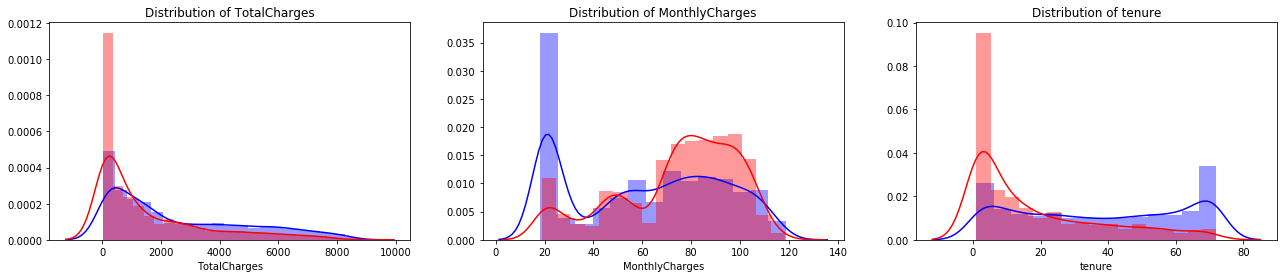

In [225]:
fig, ax = plt.subplots(1, 3, figsize=(22,4))
dfcat=pd.DataFrame()

for var in binary_col:
    df[var] = df[var].astype("category")
    df[var] = df[var].cat.codes
    #print(var, df[var].unique())
    #df[var] = df[var].astype("category")    
#df[var] = df[var].cat.codes




#df['TotalCharges'] = df['TotalCharges'].astype(float)

df_churn0 = df.loc[df['Churn']== 0]
df_churn1 = df.loc[df['Churn']== 1]
       

sn.distplot(df_churn0['TotalCharges'], ax=ax[0], color='b', label="0")
sn.distplot(df_churn1['TotalCharges'], ax=ax[0], color='r', label="1")
ax[0].set_title('Distribution of TotalCharges', fontsize=12)

sn.distplot(df_churn0['MonthlyCharges'], ax=ax[1], color='b', label="churn0")
sn.distplot(df_churn1['MonthlyCharges'], ax=ax[1], color='r', label="churn1")
ax[1].set_title('Distribution of MonthlyCharges', fontsize=12)


sn.distplot(df_churn0['tenure'], ax=ax[2], color='b', label="churn0")
sn.distplot(df_churn1['tenure'], ax=ax[2], color='r', label="churn1")
ax[2].set_title('Distribution of tenure', fontsize=12)




Text(0.5, 1.0, 'Distribution of tenure')

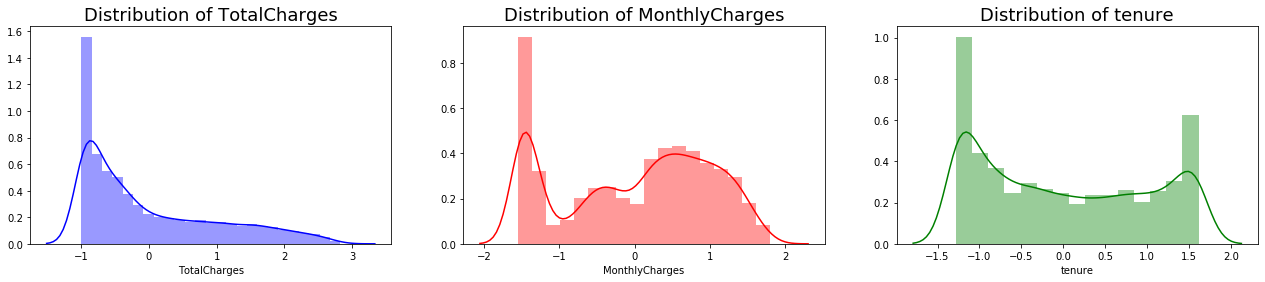

In [229]:
fig, ax = plt.subplots(1, 3, figsize=(22,4))

from sklearn.preprocessing import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col].astype('float64')),
                       columns=numeric_col)

sn.distplot(df_std['TotalCharges'], ax=ax[0], color='b')
ax[0].set_title('Distribution of TotalCharges', fontsize=18)

sn.distplot(df_std['MonthlyCharges'], ax=ax[1], color='r')
ax[1].set_title('Distribution of MonthlyCharges', fontsize=18)


sn.distplot(df_std['tenure'], ax=ax[2], color='g')
ax[2].set_title('Distribution of tenure', fontsize=18)




In [230]:
dr22 = df.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)
df = pd.concat([df_std, dr22], axis=1, join='inner')
df.head()

,TotalCharges,MonthlyCharges,tenure,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.993984,-1.161743,-1.280278,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,-0.173678,-0.260680,0.064180,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,-0.959446,-0.363754,-1.239537,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,-0.195182,-0.747786,0.512333,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,-0.940257,0.196501,-1.239537,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


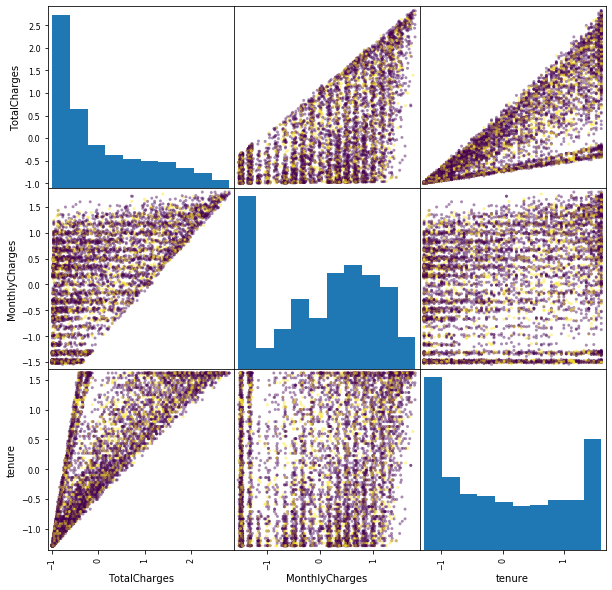

In [231]:
numeric_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']
color = df['Churn'].tolist()

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(df[numeric_columns], c=color ,  
                           # Make figure large to show details
                           figsize = [10,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.45)


plt.show()

In [232]:
list1= []
dict1 = {}
dicttotal = {}
# we have 16 binary columns
binary_col = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for k in binary_col:
    list1= []
    for i in range(2):        
        for j in range(2):        
            num = (df.loc[(df[k]== i) & (df['Churn']== j)].shape[0]) * 100 /(df.loc[df['Churn']].shape[0])
            list1.append(num)
        #dict1[i]=list1
    #print(list1)
    dict1[k]=list1
dict1
#dicttotal[k].update(dict1[k])
    

dfss = pd.DataFrame.from_dict(dict1, columns=['NoChurn_NoProperties', 'Chrun_NoProperties','NoChurn_Properties','Churn_Properties' ], orient='index') 
dfs = dfss.sort_values('NoChurn_NoProperties', ascending=False)
dfs
 

,NoChurn_NoProperties,Chrun_NoProperties,NoChurn_Properties,Churn_Properties
SeniorCitizen,63.951993,19.831404,9.458494,6.758108
OnlineSecurity,48.921274,22.403200,24.489213,4.186312
TechSupport,48.792685,22.188884,24.617803,4.400629
Dependents,48.135448,21.945992,25.275039,4.643521
DeviceProtection,46.792399,18.816974,26.618088,7.772539
StreamingTV,46.620946,14.987855,26.789541,11.601657
OnlineBackup,46.392342,19.145592,27.018145,7.443921
StreamingMovies,46.220889,14.902129,27.189599,11.687384
MultipleLines,43.306187,14.502072,30.104301,12.087441
gender,36.148021,13.359051,37.262466,13.230461


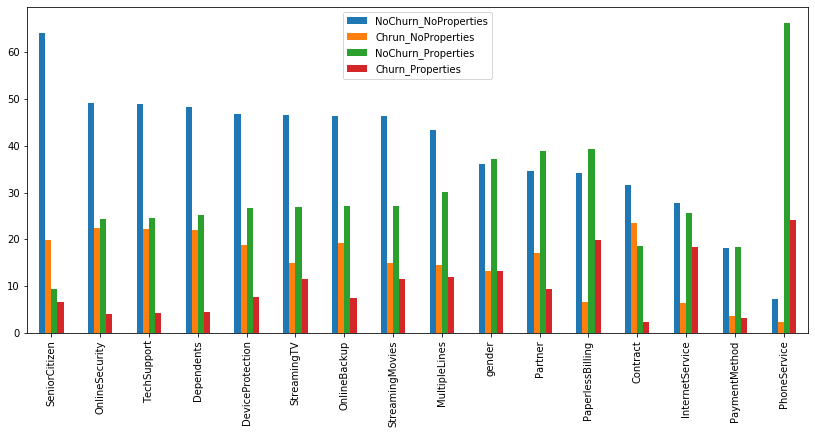

In [42]:
dfs.plot.bar(figsize = [14,6])


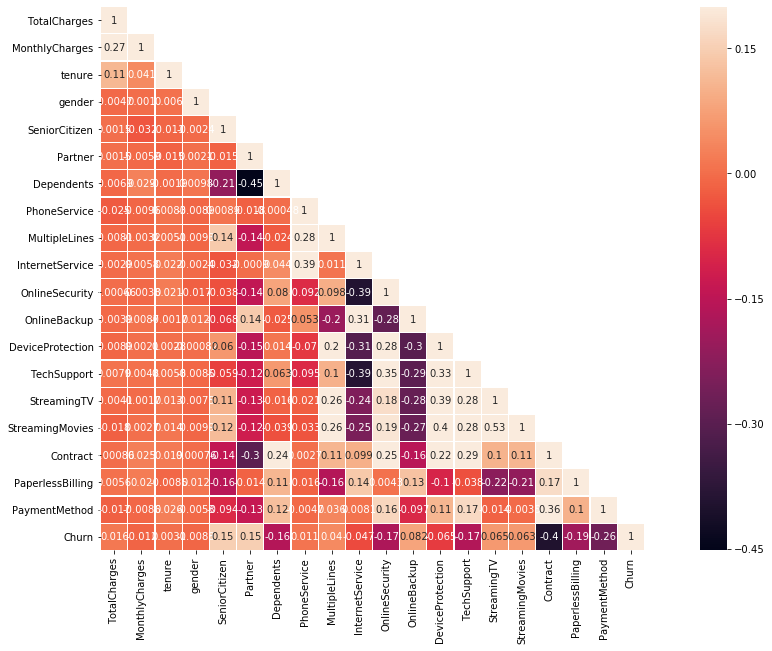

In [233]:
corrMatt = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=0.2, square=True, annot=True,  linewidths=.2)

# Feature selection and prediction

We want to check what is the most important parameter for the Churn. We have 3 colums with more that 2 categorical features. Therefore, we need to do one_hot_encoding.

In [240]:
df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
#print(df.keys())
print('Intial number of rows:', df.shape )

# remove the 'customerID' from the list.
df.drop(['customerID'],axis=1, inplace=True)

# replace the space with nan and remove the non from rows.
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)
print('Number of rows after removing empty spaces:', df.shape)
df.head()

Intial number of rows: (7043, 21)
Number of rows after removing empty spaces: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [203]:
df_hot = pd.get_dummies(df)
df_hot.keys()

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [243]:
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']

df = pd.get_dummies(df)
X, y = df_hot.drop(drop,axis=1), df_hot['Churn_Yes']

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


Best hyerparameters:
 {'max_depth': 2, 'max_features': 0.2, 'n_estimators': 100, 'subsample': 0.4}
ROC AUC score: 0.70
Classifcation report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1555
           1       0.67      0.49      0.57       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion matrix:
 [[1424  131]
 [ 283  272]]


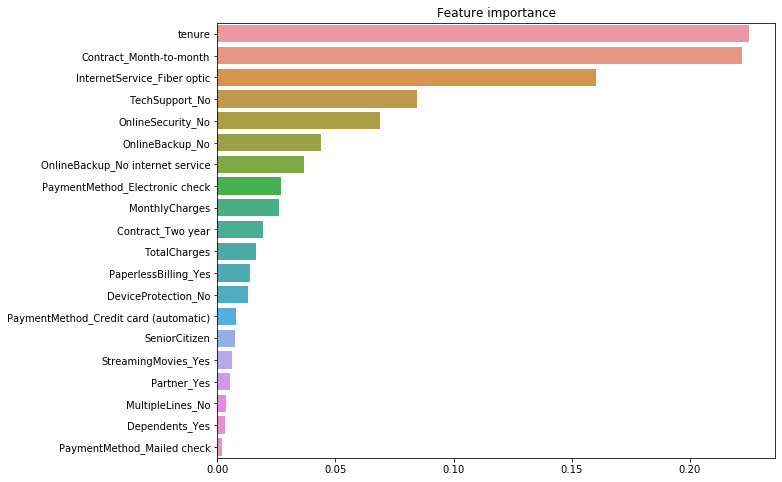

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,
                                    random_state=SEED)

# Instantiate a stochastic GradientBoostingClassifier 'sgbt'
sgbt = GradientBoostingClassifier(max_depth=1, 
                                subsample=0.4,
                                max_features=0.2,
                                n_estimators=100,
                                random_state=SEED)
# Define the dictionary 'params_rf'
params_sgbt = {
             'n_estimators': [100, 150 ],
             'max_depth': [1, 2, 4],
             'max_features': [0.1, 0.2], 
             'subsample': [0.2, 0.4]
             }

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=sgbt,
                       param_grid=params_sgbt,
                       scoring='accuracy',
                       cv=3,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_

print('Best hyerparameters:\n', best_hyperparams)


# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = roc_auc_score(y_test, y_pred)


# Fit 'adb_clf' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = sgbt.predict(X_test)

# Evaluate test-set roc_auc_score
sgbt_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score: {:.2f}'.format(sgbt_roc_auc_score))



# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred_proba))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_proba)
print('Confusion matrix:\n', conf_mat)



# Plot features importances, just the top 20 features
importances_sgbt = pd.Series(data= sgbt.feature_importances_, index= X_train.columns)
sorted_importances_sgbt = importances_sgbt.sort_values(ascending=False).head(20)


plt.figure(figsize=(10,8))
plt.title("Feature importance")
ax = sn.barplot(y=sorted_importances_sgbt.index, x=sorted_importances_sgbt.values,  orient='h')

In [246]:
# Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()

# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

# Print the classification report 

print(classification_report(y_test, y_pred))


conf_mat_lg = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.52      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Confusion matrix:
 [[1424  131]
 [ 283  272]]


In [247]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)


# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)


# Print the classification report 
print(classification_report(y_test, y_pred))


conf_mat_rf = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1555
           1       0.29      0.24      0.26       555

    accuracy                           0.65      2110
   macro avg       0.52      0.52      0.51      2110
weighted avg       0.63      0.65      0.63      2110

Confusion matrix:
 [[1424  131]
 [ 283  272]]


# Model adjustments in ensemble methods: Voting classifier

A simple way to adjust our models to deal with imbalanced data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.
Adjusting your Random Forest to fraud detection. We'll define weights manually, to be able to off-set that imbalance slightly. In our case we have 25 percent churn to 75 non-churn cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on

In [248]:
# Import the package
from sklearn.ensemble import VotingClassifier


def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  #probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))



# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:1}, random_state=SEED)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=SEED)
clf3 = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

C:\Users\Hamid\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1555
           1       0.52      0.65      0.58       555

    accuracy                           0.75      2110
   macro avg       0.69      0.72      0.70      2110
weighted avg       0.77      0.75      0.76      2110

[[1218  337]
 [ 192  363]]


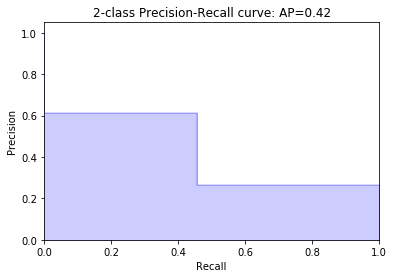

In [105]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()



# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)


# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

In [255]:
df.head()
X_train.shape[1]

40

In [257]:
from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential

# Set a random seed
n_inputs = X_train.shape[1]

# Return a new model with the given activation
 
model = Sequential()
model.add(Dense(n_inputs, input_shape=(n_inputs,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Hamid\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Hamid\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Hamid\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Hamid\Anaconda3\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Hamid\Anaconda3\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call

TypeError: can only concatenate str (not "list") to str

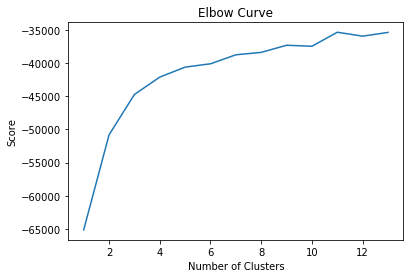

In [251]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Take the float values of df for X
X = df.values.astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)


# Define the range of clusters to try
clustno = range(1, 14)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Categorical features


In [238]:
X_train.head()

,TotalCharges,MonthlyCharges,tenure,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1303,0.175085,0.357394,0.145791,0,0,1,1,1,0,2,0,0,0,0,0,0,2,0,0
3018,1.789456,0.827747,1.612573,1,1,0,0,1,1,2,0,0,0,0,0,0,2,0,1
3739,-0.712209,0.978991,-1.035784,1,0,0,0,1,1,2,0,0,0,0,0,0,1,0,2
2977,-0.534587,-1.460858,0.797694,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,3
5347,-0.575617,-0.977209,-0.261649,1,0,1,0,1,1,1,1,1,1,1,1,1,2,1,1


# Corrlation between numerical and categorical features.